In [1]:
import pandas as pd
import re #Regular expressions (REGEX)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

df_labels = pd.read_csv("../data/raw/train_labels.csv")
df_values = pd.read_csv("../data/raw/train_values.csv")

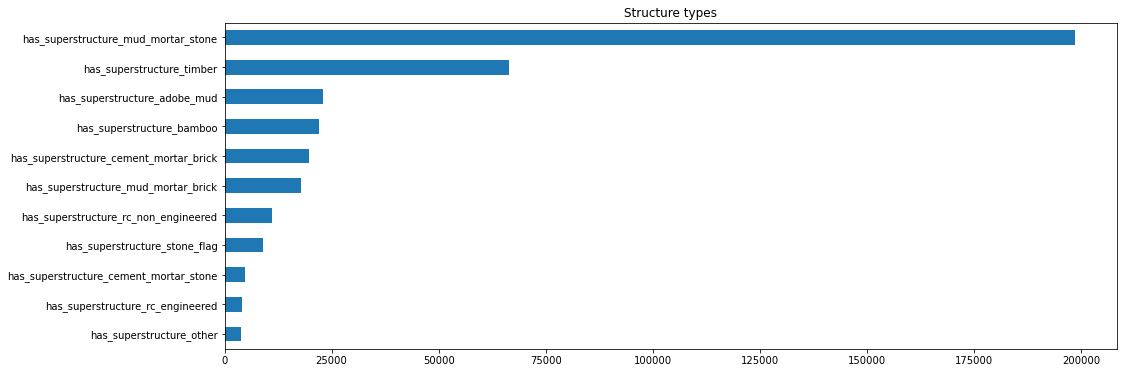

In [2]:
#Codigo del apartado 1.0 del informe.

train_df = df_values.merge(df_labels, on='building_id', how='inner')
train_df['damage_grade'] = df_labels['damage_grade'].replace({1: 'Low damage', 2: 'Medium damage', 3: 'Serious damage'})

columnas = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']
train_df[columnas].sum().sort_values().plot.barh(title='Structure types',figsize=(16,6))
plt.show()

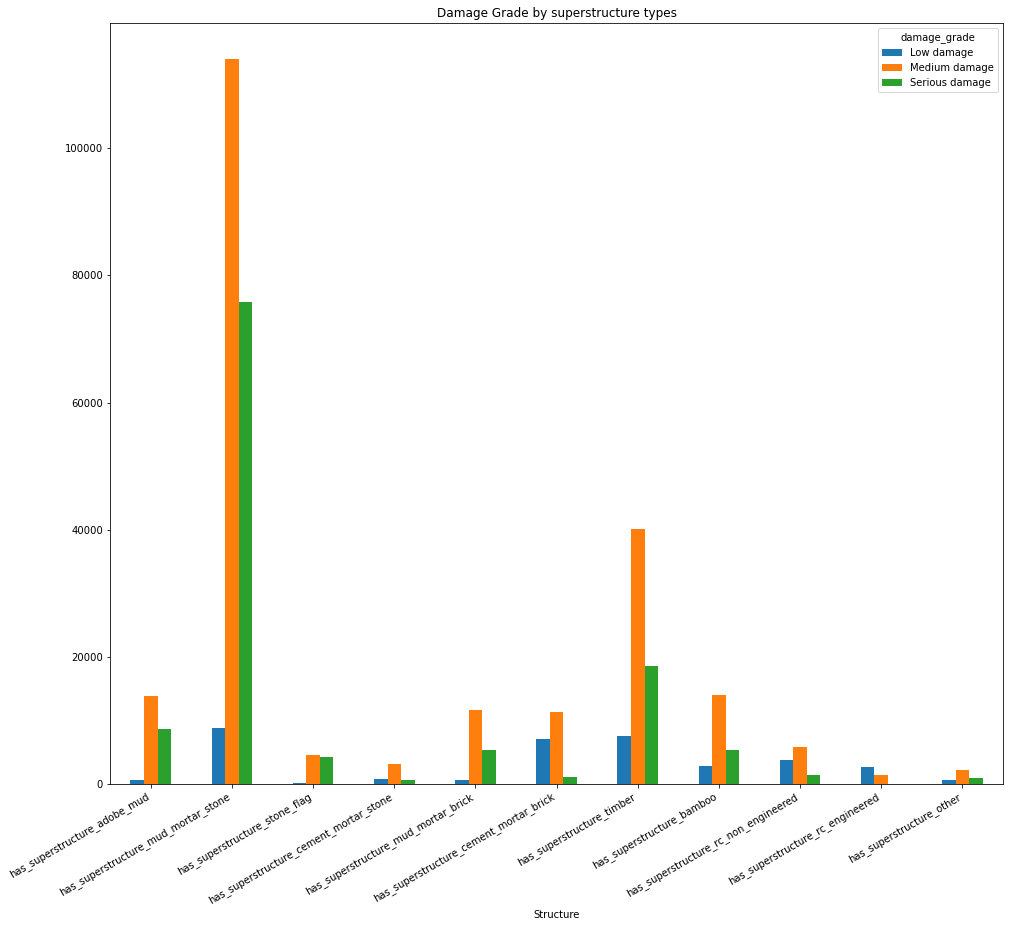

In [3]:
columnas = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']
train_df[columnas].groupby('damage_grade').sum().rename_axis('Structure', axis=1).T.plot.bar(title='Damage Grade by superstructure types', figsize=(16,14))
plt.xticks(rotation=30, ha='right')
plt.show()

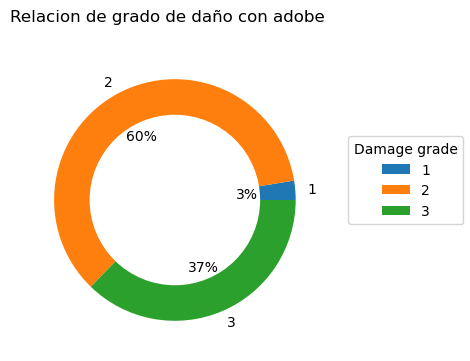

In [4]:
#Codigo del apartado 1.1 del informe.

df_values["has_superstructure_adobe_mud"] = pd.to_numeric(df_values.has_superstructure_adobe_mud, errors='coerce')
res = df_values.loc[df_values["has_superstructure_adobe_mud"] == 1].merge(df_labels, on = "building_id").groupby(["damage_grade"]).count().rename(columns = {"building_id":"total_adobe"})["total_adobe"]

circulo_centro = plt.Circle( (0,0), 0.7, color='white')
plt.figure(dpi=100)
plt.pie(res.values, labels=res.index.to_list(),autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circulo_centro)
p.legend(title='Damage grade', loc = "center right")
plt.suptitle('Relacion de grado de daño con adobe')
plt.show()

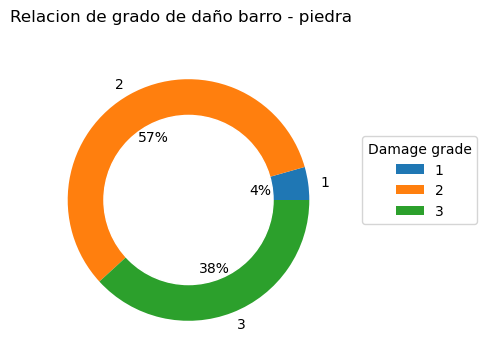

In [5]:
#Codigo del apartado 1.2 del informe.

df_values["has_superstructure_mud_mortar_stone"] = pd.to_numeric(df_values.has_superstructure_mud_mortar_stone, errors='coerce')
res = df_values.loc[df_values["has_superstructure_mud_mortar_stone"] == 1].merge(df_labels, on = "building_id").groupby(["damage_grade"]).count().rename(columns = {"building_id":"total_barro_piedra"})["total_barro_piedra"]

circulo_centro = plt.Circle( (0,0), 0.7, color='white')
plt.figure(dpi=100)
plt.pie(res.values, labels=res.index.to_list(),autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circulo_centro)
p.legend(title='Damage grade', loc = "center right")
plt.suptitle('Relacion de grado de daño barro - piedra')
plt.show()

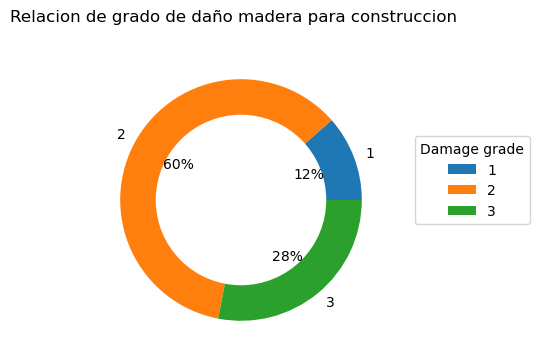

In [6]:
#Codigo del apartado 1.3 del informe.

df_values["has_superstructure_timber"] = pd.to_numeric(df_values.has_superstructure_timber, errors='coerce')
res = df_values.loc[df_values["has_superstructure_timber"] == 1].merge(df_labels, on = "building_id").groupby(["damage_grade"]).count().rename(columns = {"building_id":"total_madera"})["total_madera"]

circulo_centro = plt.Circle( (0,0), 0.7, color='white')
plt.figure(dpi=100)
plt.pie(res.values, labels=res.index.to_list(),autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circulo_centro)
p.legend(title='Damage grade', loc = "center right")
plt.suptitle('Relacion de grado de daño madera para construccion')
plt.show()

<ipython-input-7-5cae3c6bee78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['earthquakes'] = 'a'


Text(0.5, 0.98, 'amount of buildings ratio by geographical zone id (level 1)')

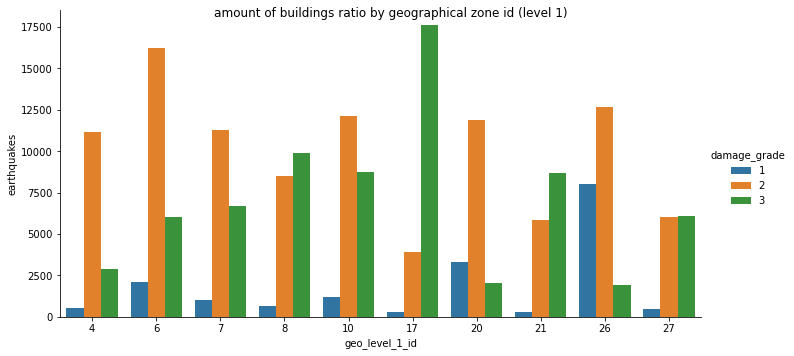

In [7]:
#Codigo del apartado 2.0 del informe.

df3 = df_values.merge(df_labels, on='building_id')
df4 = df3[['geo_level_1_id', 'damage_grade']]
top10 = (df4.groupby('geo_level_1_id').count().reset_index().nlargest(10, 'damage_grade')['geo_level_1_id']).tolist()
df5 = df4.loc[df4['geo_level_1_id'].isin(top10)]
df5['earthquakes'] = 'a'
df5 = df5.groupby(['geo_level_1_id', 'damage_grade']).count().reset_index()
sns.catplot(x="geo_level_1_id", y='earthquakes', hue='damage_grade', data=df5, kind='bar', height=5, aspect=2).fig.suptitle('amount of buildings ratio by geographical zone id (level 1)')

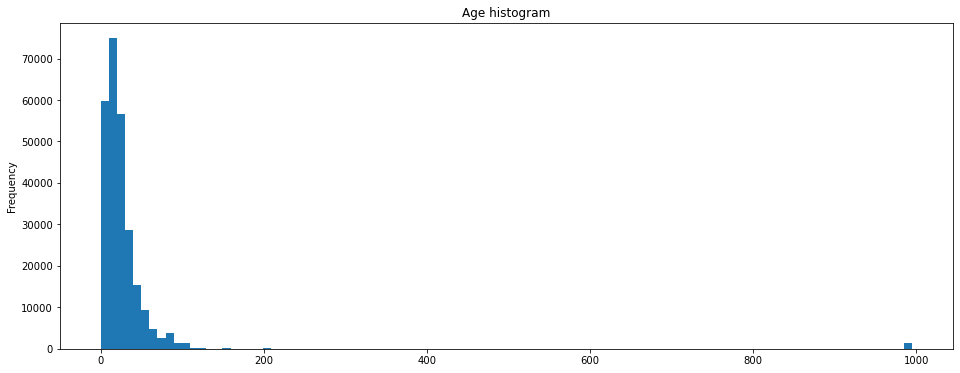

In [8]:
#Codigo del apartado 3.0 del informe.

train_df['age'].plot.hist(bins=100,title='Age histogram',figsize=(16,6))
plt.show()

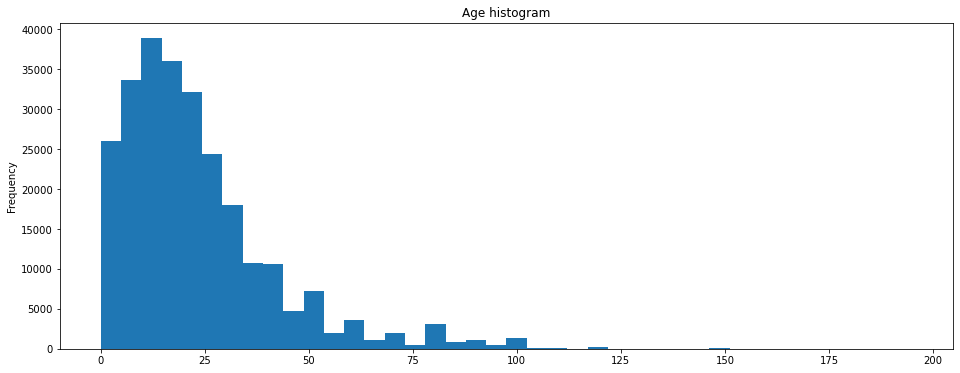

In [9]:
df_values[df_values['age']<200]['age'].plot.hist(bins=40,title='Age histogram',figsize=(16,6))
plt.show()

Text(0.5, 0.98, 'percentage quantity of damage grade by age')

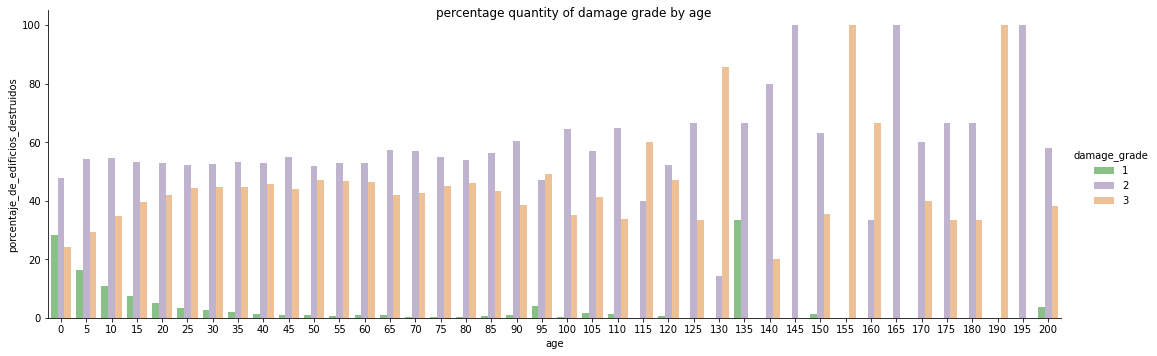

In [10]:
df6 = df5.groupby('geo_level_1_id').sum().reset_index()[['geo_level_1_id', 'earthquakes']].sort_values('earthquakes', ascending=False)
df_zona6 = df3.loc[df3['geo_level_1_id'].isin(top10)]
df_age_damage = df_zona6[['age', 'damage_grade', 'building_id']]
df_age_damage = df_age_damage.groupby(['age', 'damage_grade']).count().reset_index()
df_age_damage = df_age_damage.loc[df_age_damage['age'] <= 500]
df_age_damage['total'] = df_age_damage.groupby(['age'])['building_id'].transform('sum')
df_age_damage['porcentaje_de_edificios_destruidos'] = (df_age_damage['building_id']*100)/df_age_damage['total']
ax = sns.catplot(x='age', y='porcentaje_de_edificios_destruidos', hue='damage_grade', data=df_age_damage, aspect = 3, height=5, kind='bar', palette='Accent')\
.fig.suptitle('percentage quantity of damage grade by age')
ax

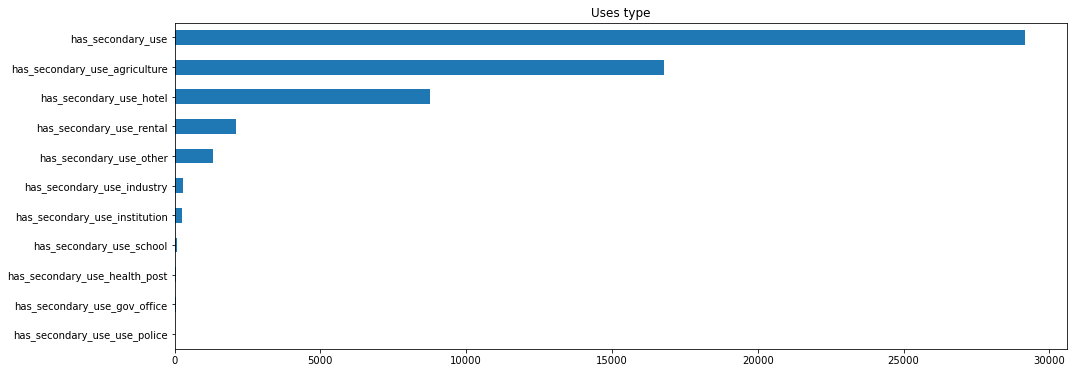

In [11]:
#Codigo del apartado 4.0 del informe.

columnas = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']
train_df[columnas].sum().sort_values().plot.barh(title='Uses type',figsize=(16,6))
plt.show()

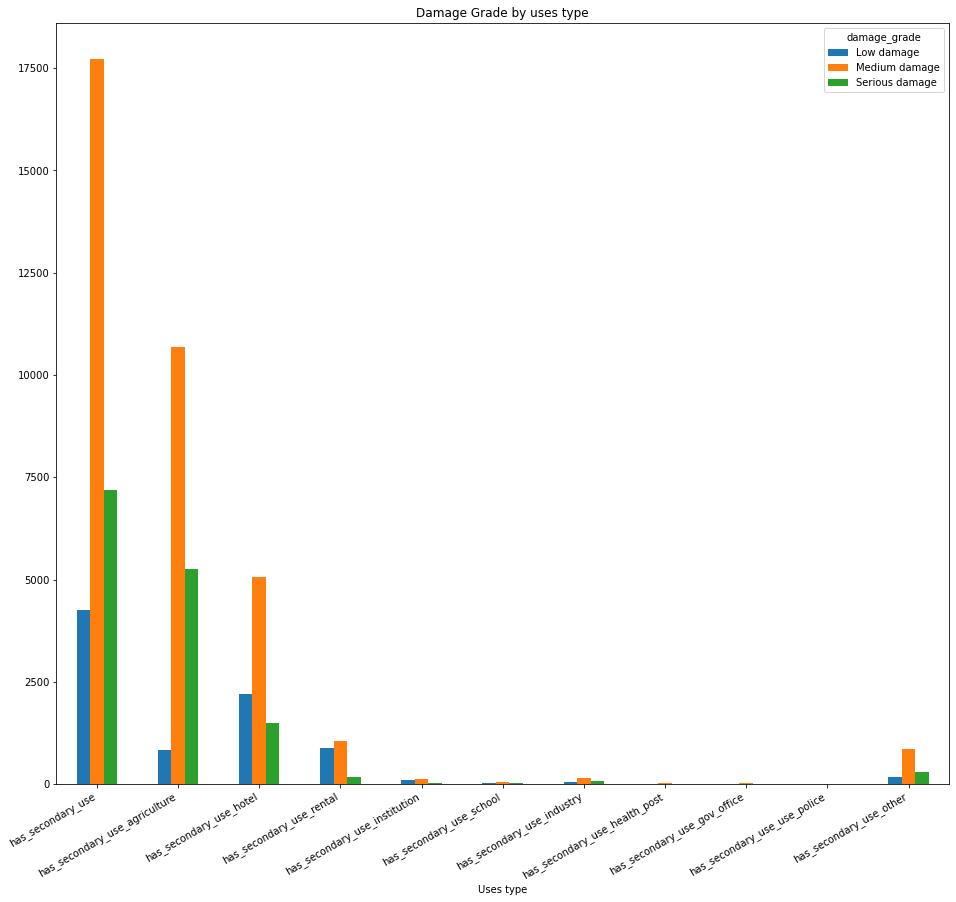

In [12]:
columnas = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','damage_grade']
train_df[columnas].groupby('damage_grade').sum().rename_axis('Uses type', axis=1).T.plot.bar(title='Damage Grade by uses type', figsize=(16,14))
plt.xticks(rotation=30, ha='right')
plt.show()

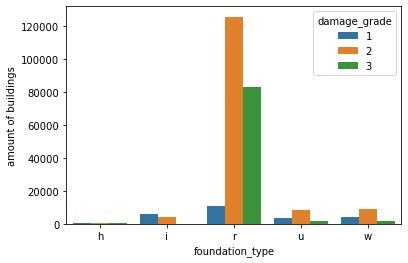

In [13]:
#Codigo del apartado 5.0 del informe.

df11 = df3[['foundation_type', 'damage_grade', 'building_id']]
df11 = df11.groupby(['foundation_type','damage_grade']).count()
df11 = df11.reset_index()
df11 = df11.rename(columns={'building_id':'amount of buildings'})
ax = sns.barplot(x='foundation_type', y='amount of buildings', hue='damage_grade', data=df11) ##CORRECT ONE

Text(0.5, 0.98, 'amount of buildings and their Damage grade by roof type')

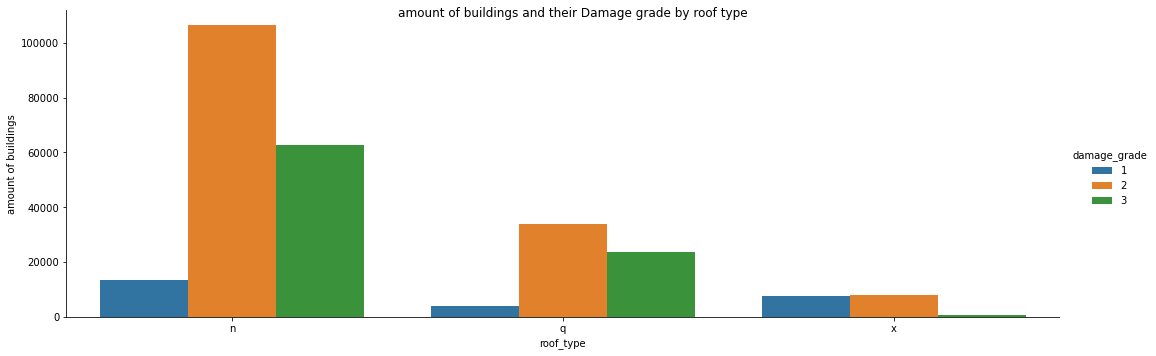

In [14]:
#Codigo del apartado 6.0 del informe.

df10 = df3[['roof_type', 'damage_grade','building_id']]
df10 = df10.groupby(['roof_type','damage_grade']).count().reset_index()
df10 = df10.rename(columns={'building_id':'amount of buildings'})
ax = sns.catplot(x='roof_type', y='amount of buildings', hue='damage_grade', data=df10, aspect = 3, height=5, kind='bar')\
.fig.suptitle('amount of buildings and their Damage grade by roof type')
ax

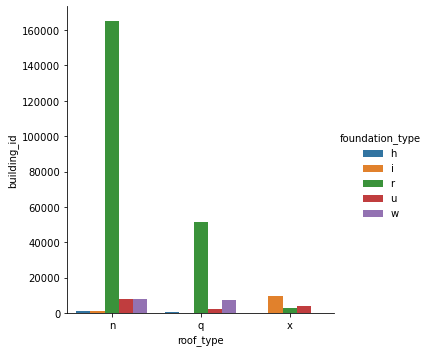

In [15]:
#Codigo del apartado 6.1 del informe.

df2 = df_values[['building_id', 'roof_type', 'foundation_type']] 
df2 = df2.groupby(['roof_type', 'foundation_type']).count().reset_index()
sns.catplot(x='roof_type', y='building_id', hue='foundation_type', data=df2, kind='bar')

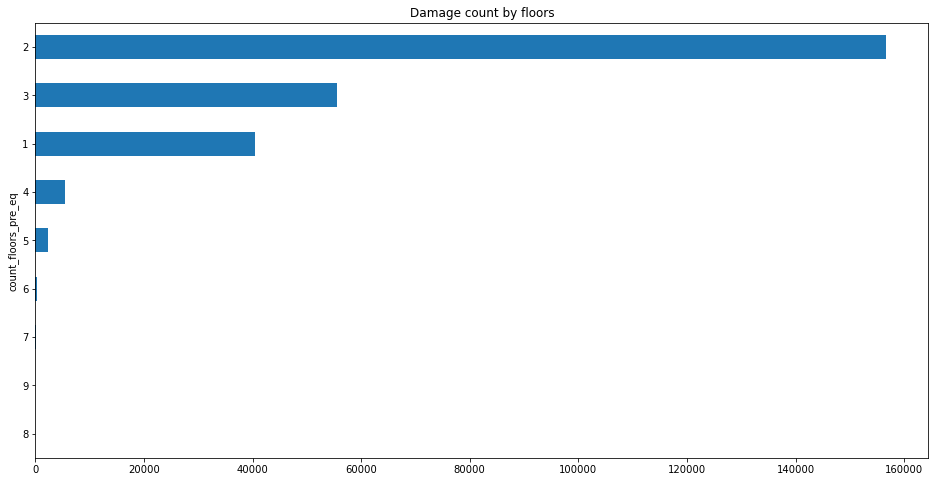

In [16]:
#Codigo del apartado 7.0 del informe.

df_values.groupby('count_floors_pre_eq').size().sort_values().plot.barh(title='Damage count by floors',figsize=(16,8))
plt.show()

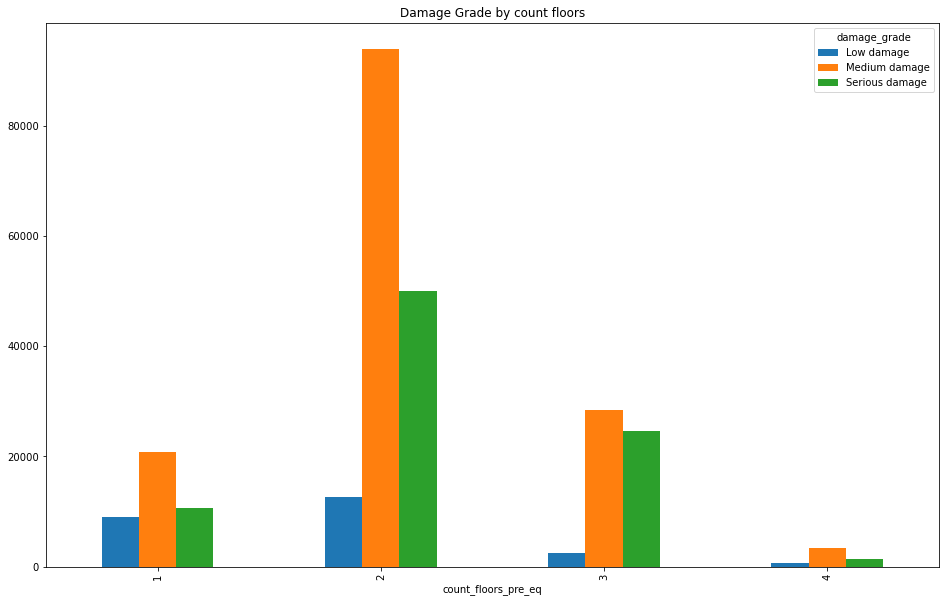

In [17]:
condicion = train_df['count_floors_pre_eq'].isin([1,2,3,4])
columnas = ['count_floors_pre_eq','damage_grade']
floors_damage_df = train_df.loc[condicion, columnas]
floors_damage_df.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack(fill_value=0).plot.bar(title='Damage Grade by count floors', figsize=(16,10))
plt.show()

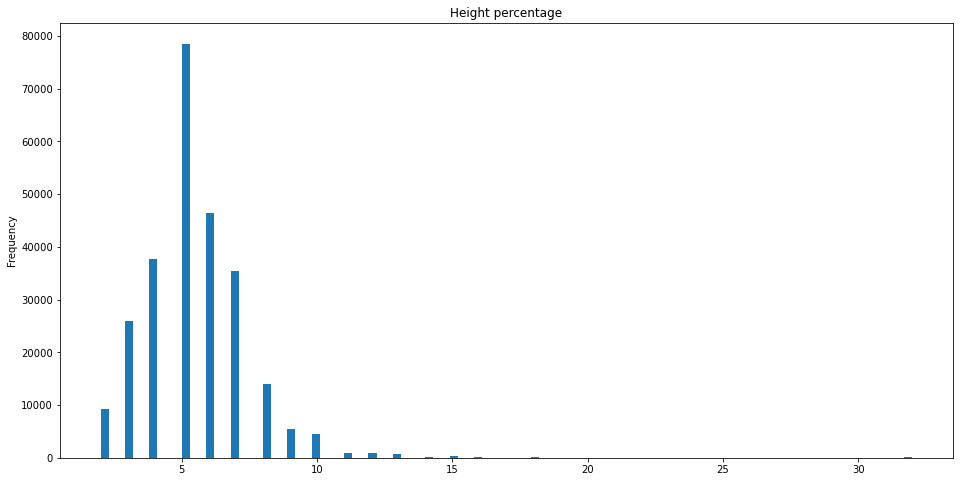

In [18]:
#Codigo del apartado 8.0 del informe.
train_df['height_percentage'].plot.hist(bins=100,title='Height percentage',figsize=(16,8))
plt.show()

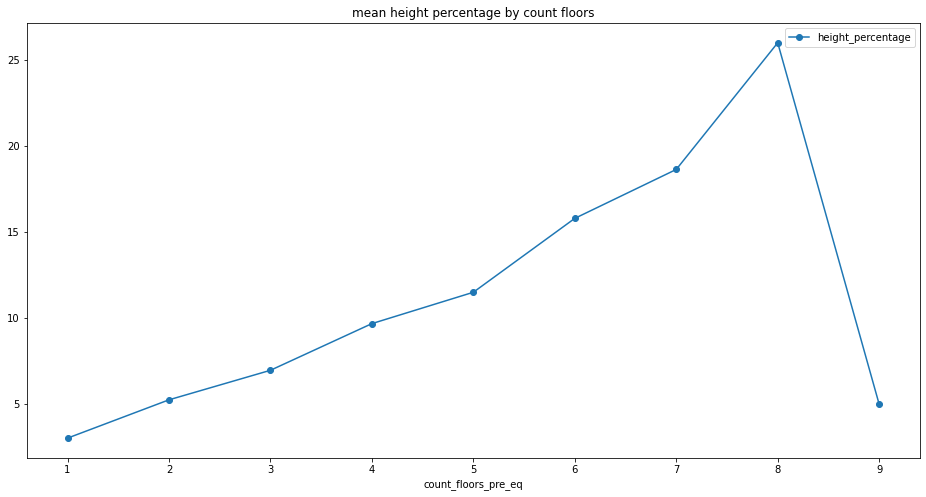

In [19]:
train_df.groupby('count_floors_pre_eq').agg({'height_percentage':np.mean}).plot(marker='o',title='mean height percentage by count floors',figsize=(16,8))

plt.show()